In [1]:
import numpy as np

np.random.seed(42)

n = 400  # número de operaciones

# A) Traicionera (cola izquierda brutal)
A = np.random.normal(loc=0.002, scale=0.004, size=n)
A[np.random.choice(n, 2, replace=False)] -= 0.15  # catástrofes

# B) Tranquila (cola izquierda suave)
B = np.random.normal(loc=0.002, scale=0.005, size=n)
B[np.random.choice(n, 5, replace=False)] -= 0.03  # pérdidas moderadas raras

# C) Incómoda (cola derecha)
C = np.random.normal(loc=-0.001, scale=0.004, size=n)
C[np.random.choice(n, 6, replace=False)] += 0.20  # rescates enormes

# D) Ruido
D = np.random.normal(loc=0.0, scale=0.01, size=n)


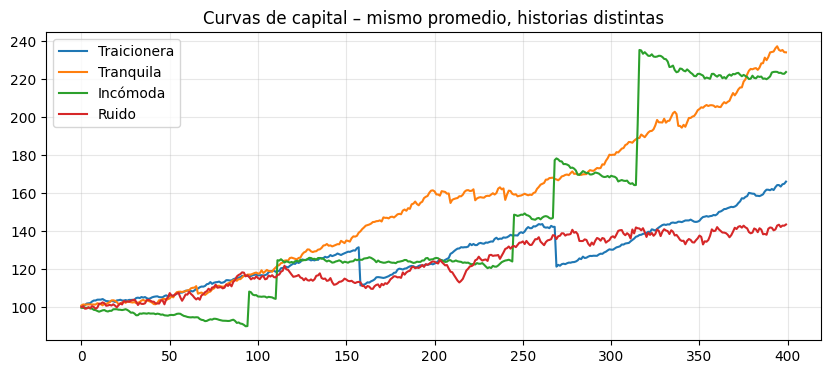

In [2]:
import matplotlib.pyplot as plt

def equity_curve(returns, capital=100):
    return capital * np.cumprod(1 + returns)

plt.figure(figsize=(10,4))
plt.plot(equity_curve(A), label="Traicionera")
plt.plot(equity_curve(B), label="Tranquila")
plt.plot(equity_curve(C), label="Incómoda")
plt.plot(equity_curve(D), label="Ruido")
plt.legend()
plt.title("Curvas de capital – mismo promedio, historias distintas")
plt.grid(alpha=0.3)
plt.show()


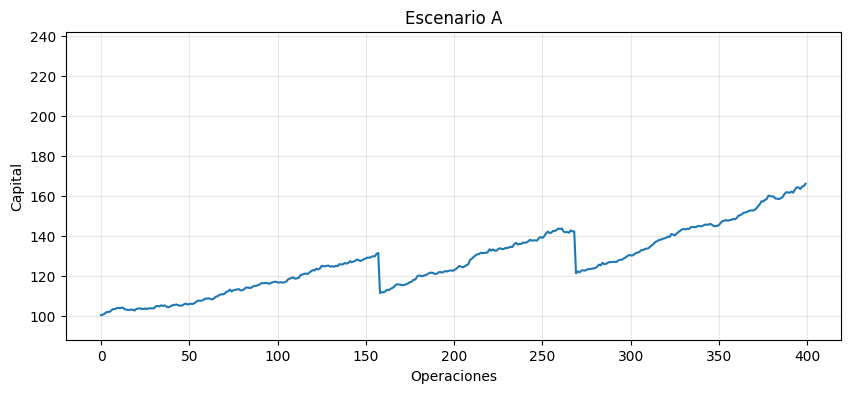

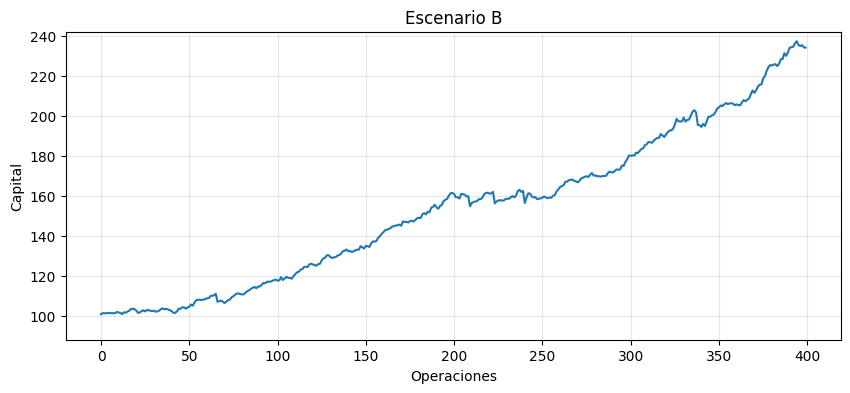

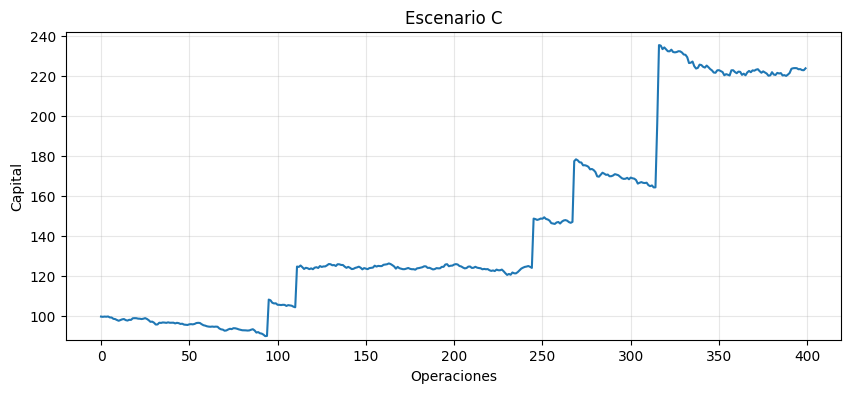

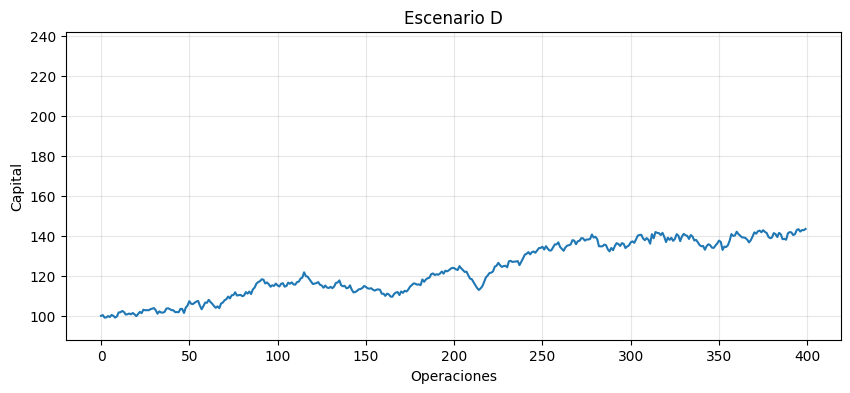

array([ 99.98169652, 100.37886842,  99.10602868,  99.22825523,
        99.87967008,  99.3894885 , 100.44523776,  99.97572223,
        99.11587017,  99.66778815, 101.69432708, 101.78112687,
       102.42734319, 101.90627765, 100.64099278, 100.80832418,
       101.13534635, 100.77337173, 101.40930866, 100.74601065,
        99.83719472, 100.89611087, 101.97100519, 101.32415915,
       103.06576996, 102.76986123, 102.85699246, 102.76992141,
       103.30818937, 103.58859   , 103.85580937, 102.79693538,
       101.06114507, 102.21542507, 101.65789513, 101.60804883,
       101.94010283, 103.60071689, 103.76788486, 103.35821178,
       102.81708567, 102.77867645, 101.84404338, 101.87345158,
       101.82045733, 103.49186757, 103.40534719, 101.41532353,
       104.12667333, 105.12299246, 107.31201978, 106.07007632,
       105.83478449, 106.54853559, 107.12005274, 107.44884457,
       105.08538827, 103.28586462, 104.85324838, 106.63085647,
       106.51713329, 107.99817677, 106.89310944, 106.04

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def equity_curve(returns, capital=100):
    return capital * np.cumprod(1 + returns)

def plot_equity(returns, title, capital=100, ylim=None):
    eq = equity_curve(returns, capital=capital)
    plt.figure(figsize=(10,4))
    plt.plot(eq)
    plt.title(title)
    plt.xlabel("Operaciones")
    plt.ylabel("Capital")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.grid(alpha=0.3)
    plt.show()
    return eq

# Primero calculás las curvas para decidir una escala común
eqA = equity_curve(A); eqB = equity_curve(B); eqC = equity_curve(C); eqD = equity_curve(D)
ymin = min(eqA.min(), eqB.min(), eqC.min(), eqD.min())
ymax = max(eqA.max(), eqB.max(), eqC.max(), eqD.max())
common_ylim = (ymin*0.98, ymax*1.02)

plot_equity(A, "Escenario A", ylim=common_ylim)
plot_equity(B, "Escenario B", ylim=common_ylim)
plot_equity(C, "Escenario C", ylim=common_ylim)
plot_equity(D, "Escenario D", ylim=common_ylim)


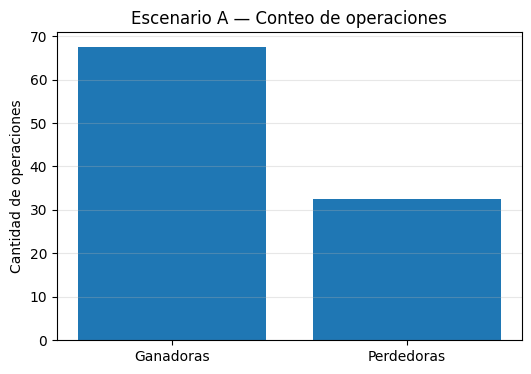

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def plot_win_loss_count(returns, title="Operaciones ganadoras vs perdedoras"):
    wins = np.sum(returns > 0) / n * 100
    losses = np.sum(returns <= 0) / n * 100

    plt.figure(figsize=(6,4))
    plt.bar(["Ganadoras", "Perdedoras"], [wins, losses])
    plt.title(title)
    plt.ylabel("Cantidad de operaciones")
    plt.grid(axis="y", alpha=0.3)
    plt.show()

# Ejemplo:
plot_win_loss_count(B, "Escenario A — Conteo de operaciones")


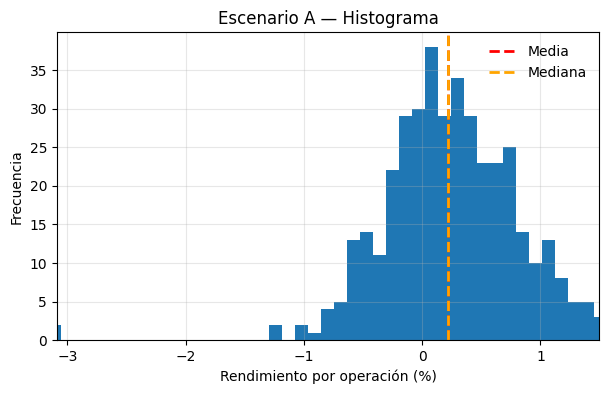

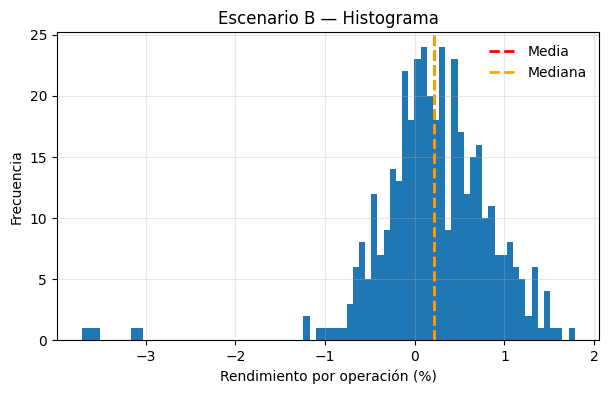

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def hist_with_lines(r_pct, title, bins=50, xlim=None):
    plt.figure(figsize=(7,4))
    plt.hist(r_pct, bins=bins)
    plt.title(title)
    plt.xlabel("Rendimiento por operación (%)")
    plt.ylabel("Frecuencia")
    plt.axvline(np.mean(r_pct), linestyle="--", linewidth=2, color="red", label="Media")
    plt.axvline(np.median(r_pct), linestyle="--", linewidth=2, color="orange", label="Mediana")
    if xlim is not None:
        plt.xlim(*xlim)
    plt.grid(alpha=0.3)
    plt.legend(frameon=False)
    plt.show()

r_pct = np.asarray(B) * 100  # o tu array de retornos

# Vista A: zoom al cuerpo (sin que el outlier arruine la escala)
lo, hi = np.percentile(r_pct, [1, 99])
hist_with_lines(r_pct, "Escenario A — Histograma", bins=50, xlim=(lo, hi))

# Vista B: cola completa (para que se vea el extremo)
hist_with_lines(r_pct, "Escenario B — Histograma", bins=80)


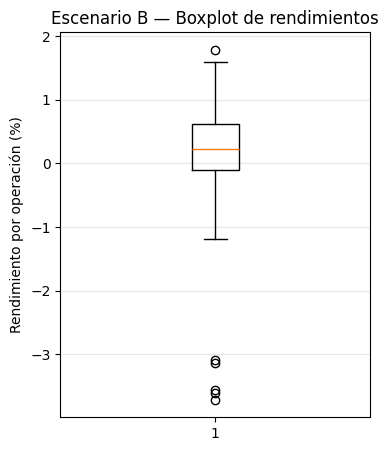

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def plot_boxplot(returns, title="Boxplot de rendimientos por operación"):
    r_pct = np.asarray(returns) * 100  # pasar a porcentaje

    plt.figure(figsize=(4,5))
    plt.boxplot(r_pct, vert=True)
    plt.title(title)
    plt.ylabel("Rendimiento por operación (%)")
    plt.grid(axis="y", alpha=0.3)
    plt.show()

# Ejemplo:
plot_boxplot(B, "Escenario B — Boxplot de rendimientos")


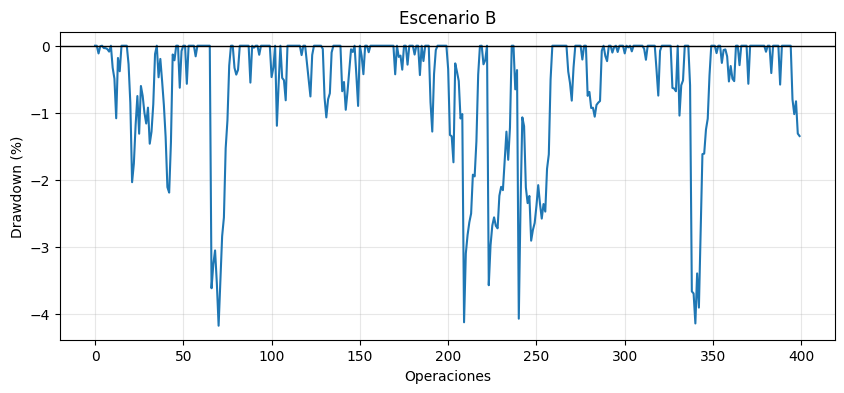

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def equity_curve(returns, capital=100):
    returns = np.asarray(returns)
    return capital * np.cumprod(1 + returns)

def drawdown_curve(returns, capital=100):
    equity = equity_curve(returns, capital)
    running_max = np.maximum.accumulate(equity)
    drawdown = (equity - running_max) / running_max
    return drawdown * 100  # en porcentaje

def plot_drawdown(returns, title="Drawdown de la estrategia", capital=100):
    dd = drawdown_curve(returns, capital)

    plt.figure(figsize=(10,4))
    plt.plot(dd)
    plt.axhline(0, color="black", linewidth=1)
    plt.title(title)
    plt.xlabel("Operaciones")
    plt.ylabel("Drawdown (%)")
    plt.grid(alpha=0.3)
    plt.show()

# Ejemplo:
plot_drawdown(B, "Escenario B")
